In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Власні інтеграли

In [4]:
# def fun_integ(x):
#     return 1/(1+(np.log(x)**(1/2)))
def fun_integ(x):
    return np.log(1+x)/(x**2+1)


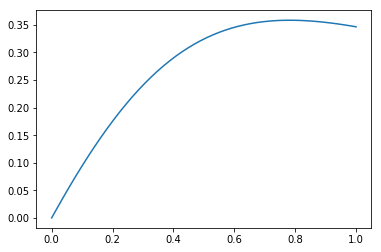

In [5]:
plt.plot(np.linspace(0, 1), fun_integ(np.linspace(0, 1)))

In [45]:
a = 0
b = 1
d = b-a
epsilon = 10**(-3)
# plt.figure(figsize=(16, 10))
# plt.imshow(plt.imread("integral_ln.png"))
# plt.title("Точне значення")

In [50]:
# методом трапецій із визначенням кількості інтервалів розбиття через оцінку похибки
#M2 = round((1+2*(np.log(2))**(3/2)+3*(np.log(2))**(1/2)+np.log(4))/(16*(np.log(2))**(3/2)*(1+(np.log(2))**(3/2))), 5)
M2 = 1
print("M2 = ", M2)
n_t = int((d**2*M2/(12*epsilon))**(1/2))+1
print("n = ",n_t)
h_t = round(d/n_t, 5)
print(h_t)
x_t = [round(a+i*h_t, 5) for i in range(n_t+1)]
y_t = [round(fun_integ(i), 5) for i in x_t]
print("x = {} \ny = {}".format(x_t, y_t))
I_t = round(h_t*(y_t[0] + y_t[-1] + 2*np.sum(y_t[1:-1]))/2, 3)
print("I = ", I_t)

M2 =  1
n =  10
0.1
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] 
y = [0.0, 0.0909090909, 0.1666666667, 0.2307692308, 0.2857142857, 0.3333333333, 0.375, 0.4117647059, 0.4444444444, 0.4736842105, 0.5]
I =  0.306


In [52]:
print(np.sum(y_t[1:-1:2]))
print(np.sum(y_t[2:-1:2]))
round(h_t*(y_t[0] + y_t[-1] + 4*np.sum(y_t[1:-1:2]) + 2*np.sum(y_t[2:-1:2]))/3, 3)

1.5404605714000001
1.2718253968


0.307

In [76]:
# формула Сімпсона із використання принципу Рунге
#M4 = 0.64
epsilon = 10**(-3)
n_s = int((1/(epsilon))**(1/4) + 1)
k = 2**0
flag = True
while flag == True:
    n = k*n_s
    h_s = d/(2*n)
    print("n = ",n,"h = ", h_s)
    x_s_k = [round(a+i*h_s, 5) for i in range(2*n+1)]
    y_s_k = [round(fun_integ(i), 5) for i in x_s_k]
    #print("x = {} \ny = {}".format(x_s_k, y_s_k))
    x_s_2k = [round(a+i*h_s/2, 5) for i in range(4*n+1)]
    y_s_2k = [round(fun_integ(i), 5) for i in x_s_2k]
    #print("x = {} \ny = {}".format(x_s_2k, y_s_2k))
    if k == 1:
        I_k = round(h_s*(y_s_k[0] + y_s_k[-1] + 4*np.sum(y_s_k[1:-1:2]))/3, 5)
    else: I_k = round(h_s*(y_s_k[0] + y_s_k[-1] + 4*np.sum(y_s_k[1:-1:2]) + 2*np.sum(y_s_k[2:-1:2]))/3, 3)
    I_2k = round(h_s*(y_s_2k[0] + y_s_2k[-1] + 4*np.sum(y_s_2k[1:-1:2]) + 2*np.sum(y_s_2k[2:-1:2]))/6, 3)
    print("dI = ", round(abs(I_k-I_2k)/15, 5))
    print("I = ", I_2k)
    if round(abs(I_k-I_2k)/15, 5) <= epsilon:
        flag = False
    else: flag = True
    print("order sum: n = {}, 2n = {}".format(n, 2*n))
    k *= 2
    print("-----------------------------------------------------")

n =  6 h =  0.08333333333333333
dI =  0.00586
I =  0.307
order sum: n = 6, 2n = 12
-----------------------------------------------------
n =  12 h =  0.041666666666666664
dI =  0.0
I =  0.307
order sum: n = 12, 2n = 24
-----------------------------------------------------


In [12]:
# за допомогою формул Гауса. при n = 4
# zamina    x = (b+a)/2+(b-a)*t/2
n_g = 4
tk = [-0.861136312, -0.339981044, 0.339981044, 0.861136312]
Ak = [0.347854845, 0.652145155, 0.652145155, 0.347854845]
x_g = [(a+b)/2 + (b-a)*tk[i]/2 for i in range(n_g)]
y_g = [round(fun_integ(x_g[i])/2, 9) for i in range(n_g)]
print("x = {} \ny = {}".format(x_g, y_g))
I_g = np.sum([round(Ak[i]*y_g[i], 5) for i in range(n_g)])
print("I = ",I_g)

x = [0.43471592200000003, 0.565004739, 0.734995261, 0.865284078] 
y = [0.273691584, -0.499979486, -0.138325874, 0.116507737]
I =  -0.28054


# Неваласні інтеграли

In [186]:
def i_fun(x):
    return 1/((1+x**2)*x**(1/2))

Text(0.5,1,'Точне значення')

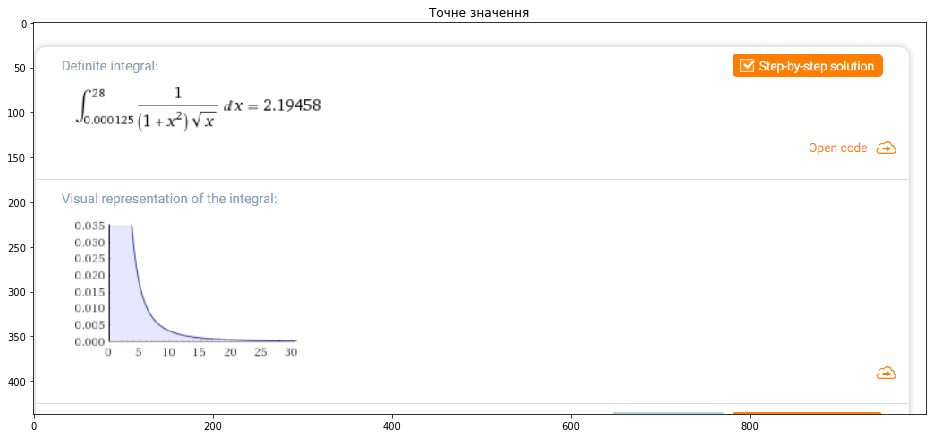

In [187]:
a0 = 0.1 #round((epsilon/32), 10)
b0 = 1
a1 = b0 
b1 = int((4/epsilon)**(2/5))+1
plt.figure(figsize=(16, 10))
plt.imshow(plt.imread("integral_nv.png"))
plt.title("Точне значення")

In [188]:
n_ = 4
x_0 = [(a0+b0)/2 + (b0-a0)*tk[i]/2 for i in range(n_)]
y_0 = [round(i_fun(x_0[i])/2, 9) for i in range(n_)]
x_1 = [(a1+b1)/2 + (b1-a1)*tk[i]/2 for i in range(n_)]
y_1 = [round(i_fun(x_1[i])/2, 9) for i in range(n_)]
print("x_0 = {} \ny_0 = {}".format(x_0, y_0))
I_0 = np.sum([round(Ak[i]*y_0[i], 5) for i in range(n_)])
print("x_1 = {} \ny_1 = {}".format(x_1, y_1))
I_1 = np.sum([round(Ak[i]*y_1[i], 5) for i in range(n_)])
I_nv = round(5*I_0/3 + 5*I_1/2, 5)
print("I_0 = ",5*I_0/3, "I_1 = ", 5*I_1/2)
print("I = ",I_nv)

x_0 = [0.16248865960000003, 0.39700853020000004, 0.7029914698, 0.9375113404000001] 
y_0 = [1.208483563, 0.685497144, 0.39910495, 0.274834794]
x_1 = [2.8746597880000007, 9.910255906, 19.089744094, 26.125340211999998] 
y_1 = [0.031834186, 0.001600878, 0.00031317, 0.000143113]
I_0 =  2.038816666666666 I_1 =  0.030899999999999997
I =  2.06972
